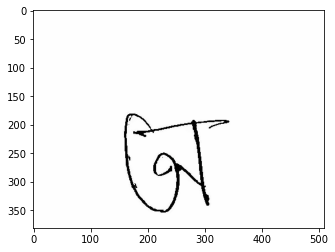

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# Read input image:
inputImage = cv2.imread(r"C:\Users\ANAND\Downloads\doc00025520201103174912_015-0-0.jpg",0)
inputCopy = inputImage.copy()


# Convert BGR to grayscale:
# grayscaleImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)
converted_img = cv2.cvtColor(inputImage, cv2.COLOR_GRAY2BGR)


# DENOISING

dst = cv2.fastNlMeansDenoisingColored(converted_img, None, 10, 10, 7, 15) 

plt.imshow(dst)

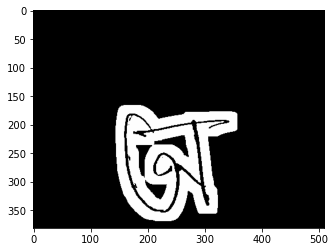

In [2]:
windowSize = 31
windowConstant = -1
# Apply the threshold:
img = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

(thresh, im_bw) = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#binaryImage = cv2.adaptiveThreshold(im_bw, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, windowSize, windowConstant)
binaryImage2 = cv2.adaptiveThreshold(im_bw, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, windowSize, windowConstant)
plt.imshow(binaryImage2)

converted_img = cv2.cvtColor(binaryImage2, cv2.COLOR_GRAY2BGR)
dst = cv2.fastNlMeansDenoisingColored(converted_img, None, 10, 10, 7, 15) 
plt.imshow(dst)

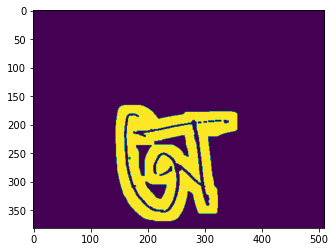

In [3]:
kernelSize = 3

# Set operation iterations:
opIterations = 1

# Get the structuring element:
maxKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))

# Perform closing:
closingImage = cv2.morphologyEx(binaryImage2, cv2.MORPH_CLOSE, maxKernel, None, None, opIterations, cv2.BORDER_REFLECT101)
plt.imshow(closingImage)

In [4]:
contours, hierarchy = cv2.findContours(closingImage, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

contours_poly = [None] * len(contours)
# The Bounding Rectangles will be stored here:
boundRect = []

# Alright, just look for the outer bounding boxes:
for i, c in enumerate(contours):

    if hierarchy[0][i][3] == -1:
        contours_poly[i] = cv2.approxPolyDP(c, 3, True)
        boundRect.append(cv2.boundingRect(contours_poly[i]))


# Draw the bounding boxes on the (copied) input image:
for i in range(len(boundRect)):
    color = (0, 255, 0)
    cv2.rectangle(inputCopy, (int(boundRect[i][0]), int(boundRect[i][1])), 
              (int(boundRect[i][0] + boundRect[i][2]), int(boundRect[i][1] + boundRect[i][3])), color, 2)


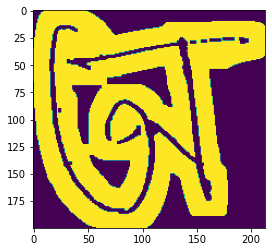

In [5]:
for i in range(len(boundRect)):
    # Get the roi for each bounding rectangle:
    x, y, w, h = boundRect[i]

    # Crop the roi:
    croppedImg = closingImage[y:y + h, x:x + w]
    plt.imshow(croppedImg)
    cv2.imshow("Cropped Character: "+str(i), croppedImg)
    cv2.waitKey(0)


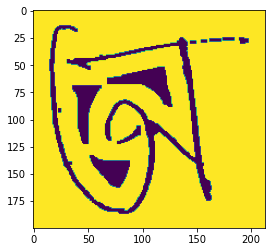

In [6]:
pad = cv2.copyMakeBorder(croppedImg, 1,1,1,1, cv2.BORDER_CONSTANT, value=0)
h, w = pad.shape

# create zeros mask 2 pixels larger in each dimension
mask = np.zeros([h + 2, w + 2], np.uint8)

# floodfill outer white border with black
img_floodfill = cv2.floodFill(pad, mask, (0,0), 255, (5), (0), flags=8)[1]

# remove border
img_floodfill = img_floodfill[1:h-1, 1:w-1]    

# save cropped image
cv2.imwrite('lungs_floodfilled.png',img_floodfill)

# show the images
cv2.imshow("img_floodfill", img_floodfill)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow( img_floodfill)